# Linear regression using scikit learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')


In [5]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

In [6]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print('raw', np.ptp(X_train,axis=0))
print('normalized', np.ptp(X_norm, axis=0))

raw [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
normalized [5.85 6.14 2.06 3.69]


In [8]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print('# iterations completed', sgdr.n_iter_, '\n# weight updates', sgdr.t_)

SGDRegressor()
# iterations completed 143 
# weight updates 14158.0


In [9]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_

print('w', w_norm, 'b', b_norm)

w [110.36 -21.14 -32.55 -38.02] b [363.16]


In [11]:
# Predictions
y_pred_sgd = sgdr.predict(X_norm)
print('predictions', y_pred_sgd[:4])

predictions [295.14 486.02 389.63 492.19]


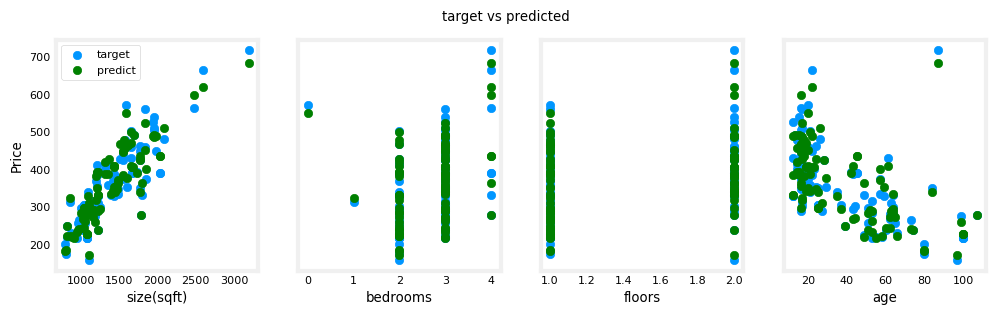

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label='target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], y_pred_sgd, color='g', label='predict')
ax[0].set_ylabel('Price')
ax[0].legend()
fig.suptitle('target vs predicted')
plt.show()